In [217]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

#Fonction qui va nous permettre de récupérer les données fichiers .csv
def load_data(name):
    file_path = os.path.join("D:\projet scoring", name)
    return pd.read_csv(file_path, encoding= 'unicode_escape')

#on récupère l'ensemble des datasets
appli_test = load_data("application_test.csv")
appli_train = load_data("application_train.csv")
bureau = load_data("bureau.csv")
bureau_balance = load_data("bureau_balance.csv")
credit_card_balance = load_data("credit_card_balance.csv")
credit = load_data("HomeCredit_columns_description.csv")
installments_payments = load_data("installments_payments.csv")
pos_cash = load_data("POS_CASH_balance.csv")
previous_app = load_data("previous_application.csv")
submission = load_data("sample_submission.csv")
appli_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
#on va commercer par supprimer les valeurs abbérantes du jeu d'entrainement ; 
#print(appli_train.columns.values)
#list(appli_train.columns[appli_train.isnull().any()])
appli_train = appli_train.dropna()
appli_train = appli_train.drop_duplicates()
appli_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [219]:
#delete the categorical columns
appli_train = appli_train.select_dtypes(exclude='object')
appli_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,2,112500.0,361462.5,16051.5,274500.0,0.025164,-15006,-1105,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,1,99000.0,675000.0,21906.0,675000.0,0.020246,-14007,-2021,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,1,261000.0,711454.5,47673.0,643500.0,0.018850,-11407,-1641,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,94500.0,270000.0,15075.0,270000.0,0.028663,-20246,-5452,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [220]:
reponse = appli_train['TARGET']
#appli_train = appli_train.drop('SK_ID_CURR',1)
reponse

71        0
124       0
152       0
161       0
255       1
         ..
307358    0
307359    0
307407    1
307456    0
307482    0
Name: TARGET, Length: 8602, dtype: int64

In [221]:
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Normalizer
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.compose import ColumnTransformer

#num_pipeline = Pipeline([
#('num', SimpleImputer(strategy="median")), #remplacez la valeur manquante en utilisant la valeur la plus fréquente le long de chaque colonne.
#('scaler', StandardScaler()), # normalisation des données
#]) 

#data_num = Data.select_dtypes(include=[np.number])
#num_attribs = list(data_num) # TOutes les catégories num
#data_cat = Data.select_dtypes(include=[np.object])
#cat_attribs = list(data_cat) # TOutes les catégories non num

#full_pipeline = ColumnTransformer([
#("num", num_pipeline, num_attribs),
#("cat", OneHotEncoder(), cat_attribs),
#])

#data_prepared = full_pipeline.fit_transform(Data)
#data_prepared

In [222]:
from sklearn.model_selection import train_test_split

X = appli_train.drop(columns=["TARGET"])
y = reponse

#on divise notre jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)


In [223]:
#1- régression logistique
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

sgd_clf = LogisticRegression() #regression logistique
sgd_clf.fit(X_train, y_train)
# Predicting the output of the test cases using the algorithm created above
print("")
y_pred = sgd_clf.predict(X_test)
a1 = accuracy_score(y_test,y_pred)
f1 = fbeta_score(y_test, y_pred, average="macro", beta=0.5)
p1 = precision_score(y_test, y_pred)
r1 = recall_score(y_test, y_pred)
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
print("")
print('matrice de la régression logistique :')
print(confusion_matrix(y_test, y_pred))

C:\Users\FNAC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\FNAC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



accuracy score :  0.939415287072913
f1 score :  0.47546887256649784
precision score :  0.0
recall score :  0.0

matrice de la régression logistique :
[[2667    0]
 [ 172    0]]


In [224]:
# 2- Random forest classifier
from sklearn.ensemble import RandomForestClassifier # classifieur de forêts 

from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set 
dectree_basic.fit(X_train, y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(X_test)

# Validating the algorithm using various Performance metrics

a2 = accuracy_score(y_test,y_pre)
f2 = fbeta_score(y_test, y_pre, average="macro", beta=0.5)
p2 = precision_score(y_test, y_pre, average="macro")
r2 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)
print("matrice de confusion")
print(confusion_matrix(y_test, y_pre))

accuracy score :  0.8781261007396971
f1 score :  0.5046889357332037
precision score :  0.5046951794155525
recall score :  0.5054520801178922
matrice de confusion
[[2479  188]
 [ 158   14]]


In [225]:
#on va déterminer les attributs les plus influents
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=50),
        'max_features': randint(low=1, high=24),
    }

forest_reg = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True, n_iter=10)
random_search.fit(X, reponse)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [226]:
cv_res = random_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params) 

0.2475171630893701 {'max_features': 2, 'n_estimators': 13}
0.24751729957447074 {'max_features': 7, 'n_estimators': 12}
0.24868884448773945 {'max_features': 23, 'n_estimators': 24}
0.24798663618867287 {'max_features': 15, 'n_estimators': 22}
0.24751729957447074 {'max_features': 4, 'n_estimators': 38}
0.24915597426548283 {'max_features': 16, 'n_estimators': 8}
0.24915583867803195 {'max_features': 10, 'n_estimators': 8}
0.25423590057162915 {'max_features': 9, 'n_estimators': 5}
0.25008680573409103 {'max_features': 15, 'n_estimators': 8}
0.2472822972209512 {'max_features': 2, 'n_estimators': 12}


In [227]:
feature_importances = random_search.best_estimator_.feature_importances_
#cat_encoder = full_pipeline.named_transformers_["cat"]
attributes = num_attribs
features = feature_importances*100
sorted(zip(features, attributes), reverse=True)

[(3.1188278162287144, 'EXT_SOURCE_2'),
 (2.6786782065199493, 'EXT_SOURCE_1'),
 (2.5436975421241894, 'LIVE_CITY_NOT_WORK_CITY'),
 (2.2728640372126234, 'DAYS_REGISTRATION'),
 (2.124042909263503, 'DAYS_BIRTH'),
 (2.122317986311816, 'LIVINGAPARTMENTS_MEDI'),
 (2.0952627759945717, 'AMT_CREDIT'),
 (2.0640468788991604, 'DAYS_EMPLOYED'),
 (2.0349752918899595, 'FLOORSMIN_AVG'),
 (1.954077578412659, 'CNT_CHILDREN'),
 (1.9422003091699522, 'REGION_POPULATION_RELATIVE'),
 (1.9307018418606998, 'NONLIVINGAREA_MODE'),
 (1.9046647607728395, 'LANDAREA_MEDI'),
 (1.8928494809916312, 'LIVINGAPARTMENTS_MODE'),
 (1.8864398946758114, 'FLOORSMIN_MODE'),
 (1.8823308511549397, 'AMT_INCOME_TOTAL'),
 (1.8735199124341244, 'YEARS_BEGINEXPLUATATION_MEDI'),
 (1.7807634966561272, 'DEF_60_CNT_SOCIAL_CIRCLE'),
 (1.7751300426187708, 'NONLIVINGAREA_AVG'),
 (1.7605528568821966, 'BASEMENTAREA_AVG'),
 (1.751684324321038, 'BASEMENTAREA_MODE'),
 (1.7446087750064958, 'YEARS_BUILD_AVG'),
 (1.7353076116382604, 'NONLIVINGAREA_MEDI'

In [236]:
index = 0
filtered_features = []
filtered_attributes = []
for i in attributes:
    if index < 104:
        if features[index] < 1.5:
            filtered_features.append(i)
            filtered_attributes.append(features[index])
    index += 1
sorted(zip(filtered_features, filtered_attributes), reverse=True)

[('YEARS_BEGINEXPLUATATION_AVG', 1.4253817633859265),
 ('TOTALAREA_MODE', 1.0558792138492474),
 ('SK_ID_CURR', 0.6649409901313096),
 ('REG_REGION_NOT_WORK_REGION', 0.11321571825143291),
 ('REG_REGION_NOT_LIVE_REGION', 0.13044892468069247),
 ('REG_CITY_NOT_WORK_CITY', 0.28362490458418504),
 ('REG_CITY_NOT_LIVE_CITY', 0.2533300258695698),
 ('REGION_RATING_CLIENT', 0.5532689395629582),
 ('OWN_CAR_AGE', 0.0),
 ('OBS_60_CNT_SOCIAL_CIRCLE', 0.2771291474573684),
 ('OBS_30_CNT_SOCIAL_CIRCLE', 0.4015538393534711),
 ('NONLIVINGAPARTMENTS_MODE', 0.7459907214753585),
 ('NONLIVINGAPARTMENTS_MEDI', 1.3253800644112947),
 ('NONLIVINGAPARTMENTS_AVG', 1.064058713887336),
 ('LIVINGAREA_MODE', 0.6554250586558233),
 ('LIVINGAREA_MEDI', 0.8886664657390914),
 ('LIVINGAREA_AVG', 0.7533798247023141),
 ('LIVE_REGION_NOT_WORK_REGION', 0.20792285876354988),
 ('LANDAREA_MODE', 1.4052042226555166),
 ('LANDAREA_AVG', 1.409660876652634),
 ('HOUR_APPR_PROCESS_START', 0.1094916700191799),
 ('FLOORSMAX_MODE', 0.77584953

In [242]:
appli_train = appli_train.drop('SK_ID_CURR',1)

KeyError: "['SK_ID_CURR'] not found in axis"

In [244]:
#appli_train = appli_train.drop(columns='SK_ID_CURR')
for i in filtered_features:
     if i != 'SK_ID_CURR':
        appli_train = appli_train.drop(columns=i)
appli_train

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,0,103500.0,573628.5,24435.0,0.009657,42.208219,2.443836,0.934247,11.441096,...,0.0000,0.1291,0.9861,0.8121,0.3750,0.0000,0.1214,0.0000,1.0,3.0
124,0,1,202500.0,260725.5,16789.5,0.018850,44.608219,11.986301,2.087671,4.093151,...,0.0000,0.1000,0.9801,0.7316,0.2083,0.0445,0.0770,0.0000,0.0,3.0
152,0,0,202500.0,675000.0,53329.5,0.031329,31.164384,6.331507,0.493151,5.504110,...,0.8183,0.4570,0.9945,0.9262,0.5000,0.2896,0.4361,0.7892,0.0,4.0
161,0,0,162000.0,263686.5,24781.5,0.022625,38.279452,12.252055,1.271233,12.408219,...,0.0178,0.1973,0.9891,0.8524,0.5000,0.4173,0.2565,0.0172,0.0,3.0
255,1,1,225000.0,1019205.0,31032.0,0.072508,31.112329,1.649315,0.917808,8.832877,...,0.0080,0.1098,0.9916,0.8859,0.5000,0.0227,0.1975,0.0077,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,2,112500.0,361462.5,16051.5,0.025164,41.112329,3.027397,4.947945,6.753425,...,0.0000,0.0728,0.9970,0.9530,0.0417,0.1435,0.0727,0.0478,0.0,0.0
307359,0,1,99000.0,675000.0,21906.0,0.020246,38.375342,5.536986,6.561644,3.224658,...,0.0013,0.1126,0.9851,0.7987,0.0000,0.1450,0.3284,0.0012,0.0,0.0
307407,1,1,261000.0,711454.5,47673.0,0.018850,31.252055,4.495890,25.446575,8.008219,...,0.0000,0.0604,0.9871,0.8256,0.2083,0.0190,0.0599,0.0000,1.0,1.0
307456,0,0,94500.0,270000.0,15075.0,0.028663,55.468493,14.936986,15.013699,10.367123,...,0.0000,0.0000,0.9767,0.6847,0.0833,0.0265,0.0086,0.0000,0.0,3.0


In [261]:
appli_train['DAYS_BIRTH'] = (appli_train['DAYS_BIRTH']*365)
appli_train['DAYS_REGISTRATION'] = (appli_train['DAYS_REGISTRATION']*365)
#appli_train['DAYS_LAST_PHONE_CHANGE'] = (appli_train['DAYS_LAST_PHONE_CHANGE']/-365)
appli_train['DAYS_EMPLOYED'] = (appli_train['DAYS_EMPLOYED']*365)
appli_train['DAYS_ID_PUBLISH'] = (appli_train['DAYS_ID_PUBLISH']*365)
appli_train

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,0,103500.0,573628.5,24435.0,0.009657,42.208219,-892.0,0.934247,-4176.0,...,0.0000,0.1291,0.9861,0.8121,0.3750,0.0000,0.1214,0.0000,1.0,3.0
124,0,1,202500.0,260725.5,16789.5,0.018850,44.608219,-4375.0,2.087671,-1494.0,...,0.0000,0.1000,0.9801,0.7316,0.2083,0.0445,0.0770,0.0000,0.0,3.0
152,0,0,202500.0,675000.0,53329.5,0.031329,31.164384,-2311.0,0.493151,-2009.0,...,0.8183,0.4570,0.9945,0.9262,0.5000,0.2896,0.4361,0.7892,0.0,4.0
161,0,0,162000.0,263686.5,24781.5,0.022625,38.279452,-4472.0,1.271233,-4529.0,...,0.0178,0.1973,0.9891,0.8524,0.5000,0.4173,0.2565,0.0172,0.0,3.0
255,1,1,225000.0,1019205.0,31032.0,0.072508,31.112329,-602.0,0.917808,-3224.0,...,0.0080,0.1098,0.9916,0.8859,0.5000,0.0227,0.1975,0.0077,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,2,112500.0,361462.5,16051.5,0.025164,41.112329,-1105.0,4.947945,-2465.0,...,0.0000,0.0728,0.9970,0.9530,0.0417,0.1435,0.0727,0.0478,0.0,0.0
307359,0,1,99000.0,675000.0,21906.0,0.020246,38.375342,-2021.0,6.561644,-1177.0,...,0.0013,0.1126,0.9851,0.7987,0.0000,0.1450,0.3284,0.0012,0.0,0.0
307407,1,1,261000.0,711454.5,47673.0,0.018850,31.252055,-1641.0,25.446575,-2923.0,...,0.0000,0.0604,0.9871,0.8256,0.2083,0.0190,0.0599,0.0000,1.0,1.0
307456,0,0,94500.0,270000.0,15075.0,0.028663,55.468493,-5452.0,15.013699,-3784.0,...,0.0000,0.0000,0.9767,0.6847,0.0833,0.0265,0.0086,0.0000,0.0,3.0


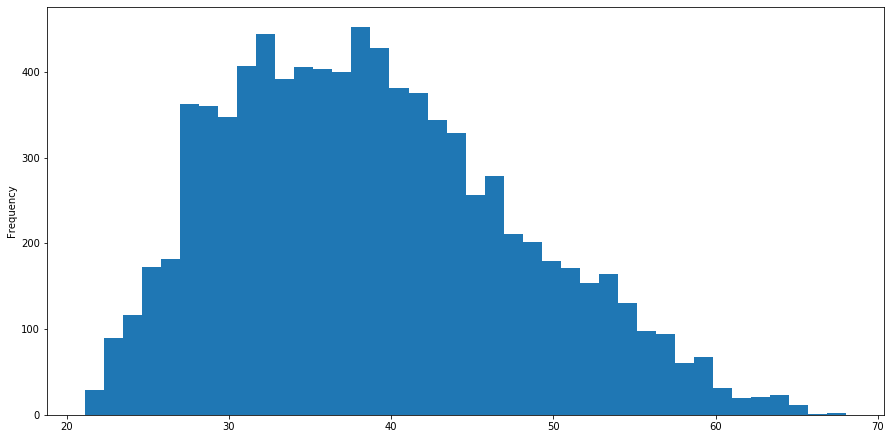

In [262]:
appli_train["DAYS_BIRTH"].plot.hist(bins = 40,figsize=(15,7.5))

In [248]:
appli_train.corr(method='pearson')

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021225,-0.041108,0.062950,-0.013710,0.024877,...,-0.018975,-0.017046,-0.012774,-0.026491,-0.033313,-0.007566,-0.026595,-0.022205,0.020796,0.033832
CNT_CHILDREN,-0.019993,1.000000,-0.023069,-0.015191,-0.020395,-0.025688,-0.175747,0.014600,-0.141624,-0.124930,...,0.008724,-0.003967,0.013005,0.024403,-0.010298,-0.002394,-0.004884,0.004072,-0.018192,-0.035499
AMT_INCOME_TOTAL,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.211133,0.119206,-0.028260,-0.005067,-0.000738,...,0.101826,0.052471,0.042025,0.054754,0.125193,-0.022473,0.101536,0.112429,-0.048258,-0.007158
AMT_CREDIT,-0.014634,-0.015191,0.348575,1.000000,0.751587,0.110804,0.198152,-0.068760,0.024419,-0.010270,...,0.030951,0.034344,-0.007945,0.015419,0.071373,-0.018938,0.038887,0.031790,-0.007642,-0.057768
AMT_ANNUITY,-0.000765,-0.020395,0.415807,0.751587,1.000000,0.142985,0.151530,-0.058623,0.010262,-0.013062,...,0.032286,0.036113,0.011571,0.023431,0.096311,-0.004275,0.058902,0.038763,-0.013251,-0.004702
REGION_POPULATION_RELATIVE,-0.021225,-0.025688,0.211133,0.110804,0.142985,1.000000,0.060821,0.004597,0.075898,0.054901,...,0.053889,0.059537,-0.038496,-0.059952,0.268459,-0.103609,0.156944,0.083922,-0.023047,-0.035349
DAYS_BIRTH,-0.041108,-0.175747,0.119206,0.198152,0.151530,0.060821,1.000000,-0.325117,0.237257,-0.060523,...,0.016050,0.036084,0.009629,-0.000970,0.034827,0.010565,0.027130,0.024168,-0.014514,0.047330
DAYS_EMPLOYED,0.062950,0.014600,-0.028260,-0.068760,-0.058623,0.004597,-0.325117,1.000000,-0.117245,0.079649,...,-0.007310,-0.032145,-0.005375,-0.006393,0.010019,-0.008592,-0.004096,-0.007432,-0.000582,-0.007192
DAYS_REGISTRATION,-0.013710,-0.141624,-0.005067,0.024419,0.010262,0.075898,0.237257,-0.117245,1.000000,0.001295,...,-0.079868,0.004794,-0.124546,-0.192218,-0.034625,-0.026119,-0.034345,-0.082555,-0.028560,0.014922
DAYS_ID_PUBLISH,0.024877,-0.124930,-0.000738,-0.010270,-0.013062,0.054901,-0.060523,0.079649,0.001295,1.000000,...,-0.006138,-0.009624,0.007039,-0.006115,0.000487,-0.026527,-0.008141,-0.003990,0.027417,0.004230


In [249]:
X = appli_train.drop(columns=["TARGET"])
y = reponse

#on divise notre jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

sgd_clf = LogisticRegression() #regression logistique
sgd_clf.fit(X_train, y_train)
# Predicting the output of the test cases using the algorithm created above
print("")
y_pred = sgd_clf.predict(X_test)
a3 = accuracy_score(y_test,y_pred)
f3 = fbeta_score(y_test, y_pred, average="macro", beta=0.5)
p3 = precision_score(y_test, y_pred)
r3 = recall_score(y_test, y_pred)
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)
print("")
print('matrice de la régression logistique :')
print(confusion_matrix(y_test, y_pred))


accuracy score :  0.939415287072913
f1 score :  0.47546887256649784
precision score :  0.0
recall score :  0.0

matrice de la régression logistique :
[[2667    0]
 [ 172    0]]


C:\Users\FNAC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [250]:
# 2- Random forest classifie
dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set 
dectree_basic.fit(X_train, y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(X_test)

# Validating the algorithm using various Performance metrics

a4 = accuracy_score(y_test,y_pre)
f4 = fbeta_score(y_test, y_pre, average="macro", beta=0.5)
p4 = precision_score(y_test, y_pre, average="macro")
r4 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("matrice de confusion")
print(confusion_matrix(y_test, y_pre))

accuracy score :  0.8848185980979218
f1 score :  0.5339197332351152
precision score :  0.5330712817378743
recall score :  0.5389286368273734
matrice de confusion
[[2487  180]
 [ 147   25]]


In [251]:
# Finding the best 10 features using chi2 test

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(f_regression, k=10).fit_transform(appli_train.drop(["TARGET"],axis = 1),appli_train["TARGET"]))
df_new.head()

,0,1,2,3,4,5,6,7,8,9
0,103500.0,0.000317,-0.006695,2.0,0.270766,0.707126,0.597192,0.3750,0.3750,3.0
1,202500.0,0.000335,-0.032839,2.0,0.647045,0.746486,0.739412,0.2083,0.2083,3.0
2,202500.0,0.000234,-0.017347,2.0,0.674832,0.616156,0.673830,0.5000,0.5000,4.0
3,162000.0,0.000287,-0.033567,2.0,0.534999,0.585859,0.788681,0.5000,0.5000,3.0
4,225000.0,0.000234,-0.004519,1.0,0.262005,0.302394,0.463275,0.5000,0.5000,1.0


In [252]:
X = df_new
y = reponse

#on divise notre jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

sgd_clf = LogisticRegression() #regression logistique
sgd_clf.fit(X_train, y_train)
# Predicting the output of the test cases using the algorithm created above
print("")
y_pred = sgd_clf.predict(X_test)
a5 = accuracy_score(y_test,y_pred)
f5 = fbeta_score(y_test, y_pred, average="macro", beta=0.5)
p5 = precision_score(y_test, y_pred)
r5 = recall_score(y_test, y_pred)
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)
print("")
print('matrice de la régression logistique :')
print(confusion_matrix(y_test, y_pred))


accuracy score :  0.939415287072913
f1 score :  0.47546887256649784
precision score :  0.0
recall score :  0.0

matrice de la régression logistique :
[[2667    0]
 [ 172    0]]


C:\Users\FNAC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [253]:
dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set 
dectree_basic.fit(X_train, y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(X_test)

# Validating the algorithm using various Performance metrics

a6 = accuracy_score(y_test,y_pre)
f6 = fbeta_score(y_test, y_pre, average="macro", beta=0.5)
p6 = precision_score(y_test, y_pre, average="macro")
r6 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
print("matrice de confusion")
print(confusion_matrix(y_test, y_pre))

accuracy score :  0.8749559704121169
f1 score :  0.5242460142107019
precision score :  0.5235738188192176
recall score :  0.5309597928165956
matrice de confusion
[[2460  207]
 [ 148   24]]


In [254]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','filtered','filtered','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6],
    'Recall Score' : [r1,r2,r3,r4,r5,r6],
    'F1 Score' : [f1,f2,f3,f4,f5,f6],
    'Precision Score' : [p1,p2,p3,p4,p5,p6]
})
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,0.939415,0.000000,0.475469,0.000000
1,Decision Tree,None,0.878126,0.505452,0.504689,0.504695
2,Logistic Regression,filtered,0.939415,0.000000,0.475469,0.000000
3,Decision Tree,filtered,0.884819,0.538929,0.533920,0.533071
4,Logistic Regression,f_regression,0.939415,0.000000,0.475469,0.000000
5,Decision Tree,f_regression,0.874956,0.530960,0.524246,0.523574


In [255]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.4418604651162791
Accuracy score for the testing dataset:  0.6107784431137725
Confusion matrix, without normalization
[[1658 1009]
 [  96   76]]

Recall metric in the testing dataset:  0.05232558139534884
Accuracy score for the testing dataset:  0.8756604438182458
Confusion matrix, without normalization
[[2477  190]
 [ 163    9]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing dataset:  0.9355406833392039
Confusion matrix, without normalization
[[2656   11]
 [ 172    0]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing dataset:  0.939415287072913
Confusion matrix, without normalization
[[2667    0]
 [ 172    0]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing dataset:  0.939415287072913
Confusion matrix, without normalization
[[2667    0]
 [ 172    0]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing dataset:  0.939415287072913
Confusion matr

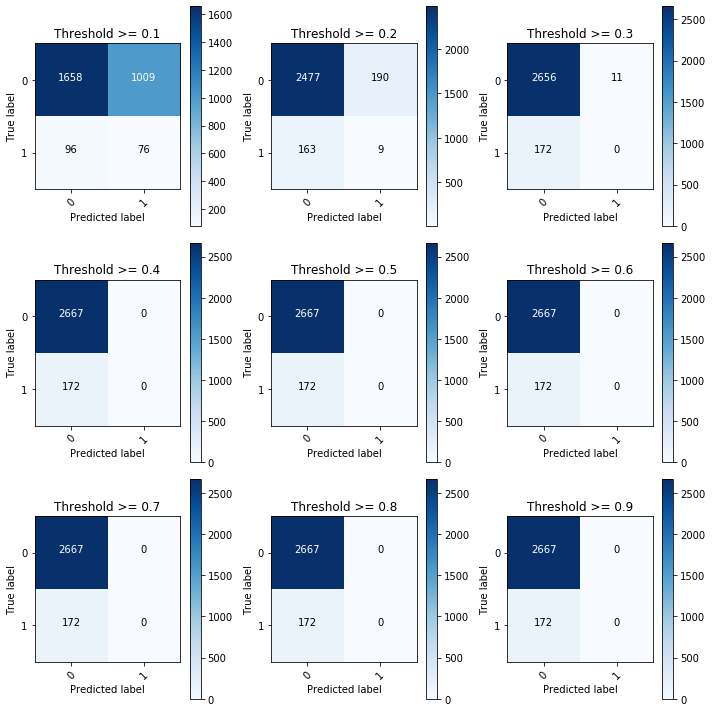

In [256]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_test, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

Recall metric in the testing dataset:  0.12790697674418605
Accuracy score for the testing dataset:  0.8770693906305037
Confusion matrix, without normalization
[[2468  199]
 [ 150   22]]

Recall metric in the testing dataset:  0.12790697674418605
Accuracy score for the testing dataset:  0.8770693906305037
Confusion matrix, without normalization
[[2468  199]
 [ 150   22]]

Recall metric in the testing dataset:  0.12790697674418605
Accuracy score for the testing dataset:  0.8770693906305037
Confusion matrix, without normalization
[[2468  199]
 [ 150   22]]

Recall metric in the testing dataset:  0.12790697674418605
Accuracy score for the testing dataset:  0.8770693906305037
Confusion matrix, without normalization
[[2468  199]
 [ 150   22]]

Recall metric in the testing dataset:  0.12790697674418605
Accuracy score for the testing dataset:  0.8770693906305037
Confusion matrix, without normalization
[[2468  199]
 [ 150   22]]

Recall metric in the testing dataset:  0.12790697674418605
Accura

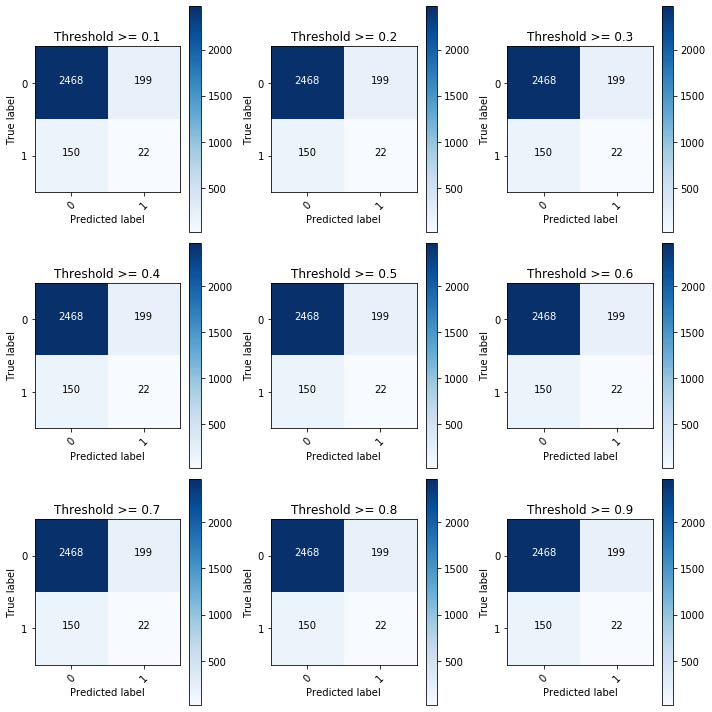

In [257]:
lr = DecisionTreeClassifier()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_test, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

In [258]:
appli_train

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,0,103500.0,573628.5,24435.0,0.009657,0.000317,-0.006695,0.000007,-0.031345,...,0.0000,0.1291,0.9861,0.8121,0.3750,0.0000,0.1214,0.0000,1.0,3.0
124,0,1,202500.0,260725.5,16789.5,0.018850,0.000335,-0.032839,0.000016,-0.011214,...,0.0000,0.1000,0.9801,0.7316,0.2083,0.0445,0.0770,0.0000,0.0,3.0
152,0,0,202500.0,675000.0,53329.5,0.031329,0.000234,-0.017347,0.000004,-0.015080,...,0.8183,0.4570,0.9945,0.9262,0.5000,0.2896,0.4361,0.7892,0.0,4.0
161,0,0,162000.0,263686.5,24781.5,0.022625,0.000287,-0.033567,0.000010,-0.033995,...,0.0178,0.1973,0.9891,0.8524,0.5000,0.4173,0.2565,0.0172,0.0,3.0
255,1,1,225000.0,1019205.0,31032.0,0.072508,0.000234,-0.004519,0.000007,-0.024200,...,0.0080,0.1098,0.9916,0.8859,0.5000,0.0227,0.1975,0.0077,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,2,112500.0,361462.5,16051.5,0.025164,0.000309,-0.008294,0.000037,-0.018503,...,0.0000,0.0728,0.9970,0.9530,0.0417,0.1435,0.0727,0.0478,0.0,0.0
307359,0,1,99000.0,675000.0,21906.0,0.020246,0.000288,-0.015170,0.000049,-0.008835,...,0.0013,0.1126,0.9851,0.7987,0.0000,0.1450,0.3284,0.0012,0.0,0.0
307407,1,1,261000.0,711454.5,47673.0,0.018850,0.000235,-0.012318,0.000191,-0.021940,...,0.0000,0.0604,0.9871,0.8256,0.2083,0.0190,0.0599,0.0000,1.0,1.0
307456,0,0,94500.0,270000.0,15075.0,0.028663,0.000416,-0.040923,0.000113,-0.028403,...,0.0000,0.0000,0.9767,0.6847,0.0833,0.0265,0.0086,0.0000,0.0,3.0


In [259]:
from bokeh.plotting import figure, show

# prepare some data
x = appli_train.AMT_ANNUITY
y = appli_train.DAYS_ID_PUBLISH

# create a new plot with a title and axis labels
p = figure(title="Simple line example", x_axis_label="x", y_axis_label="y")

# add a line renderer with legend and line thickness
p.circle(x, y, legend_label="Temp", line_width=2)

# show the results
show(p)